In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
import sqlite3
import pandas as pd

conn = sqlite3.connect("/content/drive/My Drive/Colab Notebooks/Fake_News_DB.db")

In [0]:
data = pd.read_sql("SELECT * from fake_news", conn)
data

,id,url,title,content,author,date,tags,type_of_article
0,0,https://panorama.pub/28367-rossiyanam-zapretya...,Россиянам запретят выкладывать в интернет непр...,В Госдуму внесён законопроект о «Защите положи...,Виталий Манн,2019-12-19,Политика,fake
1,1,https://panorama.pub/28365-amerikanskij-genera...,Американский генерал заявил о готовности стрел...,Командующий войсками Округа Колумбия генерал-л...,Бронислав Рубенштейн,2019-12-19,Политика,fake
2,2,https://panorama.pub/28356-donald-tramp-pohval...,Дональд Трамп похвалил Сталина,"Президент США Дональд Трамп, отвечая на вопрос...",Виталий Манн,2019-12-19,Политика,fake
3,3,https://panorama.pub/27498-formalnym-osnovanie...,Формальным основанием для импичмента Трампа ст...,Палата представителей США определилась с форму...,Бронислав Рубенштейн,2019-12-18,Политика,fake
4,4,https://panorama.pub/28237-iran-oshibochno-pod...,Иранские моряки по ошибке подавили протесты в ...,"Признавая, что они были полностью сбиты массой...",Диана Арутюнян,2019-12-18,Политика,fake
...,...,...,...,...,...,...,...,...
4917,4917,https://ria.ru//20191218/1562514885.html,В тундре Ямала ученые встретили редчайшую для ...,"ХАНТЫ-МАНСИЙСК, 18 дек - РИА Новости. Ученые в...",None,18.12.2019,"РИА Наука, Земля - РИА Наука, Ямало-Ненецкий а...",real
4918,4918,https://ria.ru//20191218/1562488382.html,"Ученые высветили ""новые грани"" кристаллов ниоб...","МОСКВА, 18 дек — РИА Новости. Ученые Крымского...",None,18.12.2019,"РИА Наука, Университетская наука, Навигатор аб...",real
4919,4919,https://ria.ru//20191218/1562494415.html,"Ученые узнали, как работа и хобби влияют на ри...","МОСКВА, 18 дек — РИА Новости. Ученые Московско...",None,18.12.2019,"РИА Наука, Университетская наука, Навигатор аб...",real
4920,4920,https://ria.ru//20191218/1562497767.html,Доставка груза на орбиту подешевеет благодаря ...,"МОСКВА, 18 дек — РИА Новости. Ученые Самарског...",None,18.12.2019,"РИА Наука, Самарский университет, Университетс...",real


### Getting the Botometer Running

In [0]:
!pip install botometer

  Created wheel for botometer: filename=botometer-1.4-cp36-none-any.whl size=2874 sha256=1c0ba89cffd264521e7b34cb5887645d4c72e5469842f62311c114b413cba3c8
  Stored in directory: /root/.cache/pip/wheels/54/65/0b/ce361d6acc341ed4479c4346cd038f8bc462d92287745f5231
Successfully built botometer


In [0]:
import pandas as pd 
import matplotlib.pyplot as plt
import botometer

In [0]:
# Seeing how many types of articles there are in my dataframe 
data['type_of_article'].nunique()

2

In [0]:
# Putting types of article in a list for processing in the botometer 
type_of_article_list = data['type_of_article'].tolist()

In [0]:
rapidapi_key = "XXXXXXXXXXX" # now it's called rapidapi key
app_auth = {
    'consumer_key': 'XXXXXXXXXX',
    'consumer_secret': 'XXXXXXXXXX',
    'access_token': 'XXXXXXXXXX',
    'access_token_secret': 'XXXXXXXXXX',
  }
bom = botometer.Botometer(wait_on_ratelimit=True,
                          rapidapi_key=rapidapi_key,
                          **app_auth)

In [0]:
# Check a sequence of sources
results = []    
sources = type_of_article_list
for screen_name, result in bom.check_accounts_in(sources):
    results.append(result)

In [0]:
# Checking the length of my results to make sure I got what I was expecting 
len(results)

In [0]:
print(results[1000:3000])

[{'error': "TweepError: [{'code': 89, 'message': 'Invalid or expired token.'}]"}, {'error': "TweepError: [{'code': 89, 'message': 'Invalid or expired token.'}]"}, {'error': "TweepError: [{'code': 89, 'message': 'Invalid or expired token.'}]"}, {'error': "TweepError: [{'code': 89, 'message': 'Invalid or expired token.'}]"}, {'error': "TweepError: [{'code': 89, 'message': 'Invalid or expired token.'}]"}, {'error': "TweepError: [{'code': 89, 'message': 'Invalid or expired token.'}]"}, {'error': "TweepError: [{'code': 89, 'message': 'Invalid or expired token.'}]"}, {'error': "TweepError: [{'code': 89, 'message': 'Invalid or expired token.'}]"}, {'error': "TweepError: [{'code': 89, 'message': 'Invalid or expired token.'}]"}, {'error': "TweepError: [{'code': 89, 'message': 'Invalid or expired token.'}]"}, {'error': "TweepError: [{'code': 89, 'message': 'Invalid or expired token.'}]"}, {'error': "TweepError: [{'code': 89, 'message': 'Invalid or expired token.'}]"}, {'error': "TweepError: [{'c

Ботометр подходит только для оценки пользователей Твиттера.

In [0]:
# Importing libraries needed for modeling
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.utils import resample
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction import stop_words
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, ExtraTreesClassifier, AdaBoostClassifier
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.feature_extraction.stop_words module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.feature_extraction.text. Anything that cannot be imported from sklearn.feature_extraction.text is now part of the private API.
  warnings.warn(message, FutureWarning)


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [0]:
X = data["content"]
y = data["type_of_article"]

X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2,
                                                    random_state=42,
                                                    stratify=y)

In [0]:
y_test.value_counts(normalize=True)

fake    0.582741
real    0.417259
Name: type_of_article, dtype: float64

### **Multinomial Naive Bayes**


In [0]:
# Building a pipeline
pipe1 = Pipeline([('tfidf', TfidfVectorizer()),
                     ('nb', MultinomialNB())
                ])
# Setting the parameters of the pipeline 
pipe_params1 = {
    'tfidf__max_features': [100, 1000, 10000],
    'tfidf__ngram_range': [(1,1), (1,2)],
    'tfidf__stop_words' : [None, stopwords.words('russian')],
}
# Instantiated the grid search
gs1 = GridSearchCV(pipe1, 
                  param_grid=pipe_params1
                 ) 
# Fitting the model
gs1.fit(X_train, y_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('tfidf',
                                        TfidfVectorizer(analyzer='word',
                                                        binary=False,
                                                        decode_error='strict',
                                                        dtype=<class 'numpy.float64'>,
                                                        encoding='utf-8',
                                                        input='content',
                                                        lowercase=True,
                                                        max_df=1.0,
                                                        max_features=None,
                                                        min_df=1,
                                                        ngram_range=(1, 1),
                                                      

In [0]:
# Checking the best score
gs1.best_score_

0.9873002921845473

In [0]:
# Setting the best estimator as the model 
gs_model = gs1.best_estimator_

In [0]:
# Checking out the training score
gs_model.score(X_train, y_train)

0.9875539751079502

In [0]:
# Checking out the testing score 
gs_model.score(X_test, y_test)

0.9908629441624366

### **Conclusions about this model:**
The Naive Bayes is often a good model for NLP, but in this case it is outperformed by other models.


### **Decision Tree**

In [0]:
pipe2 = Pipeline([('tfidf', TfidfVectorizer()),
                     ('dt', DecisionTreeClassifier())
                ])
# I removed tfidf feature options so I could try more dt hyperparameters since there has been a lot of
# consistency with hyperparametes that work best
pipe_params2 = {
    'tfidf__max_features': [10000],
    'tfidf__ngram_range': [(1,1)],
    'tfidf__stop_words' : [stopwords.words('russian')],
    'dt__max_depth': [3, 10],
    'dt__min_samples_split': [5, 20],
    'dt__min_samples_leaf': [2, 7]
}
# Instantiated grid search
gs2 = GridSearchCV(pipe2, 
                  param_grid=pipe_params2) 
# Fitting the model
gs2.fit(X_train, y_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('tfidf',
                                        TfidfVectorizer(analyzer='word',
                                                        binary=False,
                                                        decode_error='strict',
                                                        dtype=<class 'numpy.float64'>,
                                                        encoding='utf-8',
                                                        input='content',
                                                        lowercase=True,
                                                        max_df=1.0,
                                                        max_features=None,
                                                        min_df=1,
                                                        ngram_range=(1, 1),
                                                      

In [0]:
# Checking the best score
gs2.best_score_

0.9972058643309103

In [0]:
# Setting the best estimator to be the model
gs_model2 = gs2.best_estimator_

In [0]:
# Checking the training score for this model 
gs_model2.score(X_train, y_train)

0.999491998983998

In [0]:
# Checking the testing score for this model 
gs_model2.score(X_test, y_test)

1.0

### **Conclusions about this model:**
The Decision Tree/TFIDF Vectorizer model performed stronger than its counterpart. It shows signs of overfitting, however, the score between train and test is not wide enough to draw any conclusions.

### **Bagging Classifier**

In [0]:
# Building the pipeline for a bagging classifier 
pipe3 = Pipeline([('tfidf', TfidfVectorizer()),
                     ('bag', BaggingClassifier())
                ])
# Setting the parameters
pipe_params3 = {
    'tfidf__max_features': [10000],
    'tfidf__ngram_range': [(1,1)],
    'tfidf__stop_words' : [stopwords.words('russian')],
    'bag__max_samples' : [.5, 1.0, 10],
    'bag__n_estimators' : [2, 6, 10]
}
# Instantiated the grid search
gs3 = GridSearchCV(pipe3, 
                  param_grid=pipe_params3) 
# Fitting the model to the data
gs3.fit(X_train, y_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('tfidf',
                                        TfidfVectorizer(analyzer='word',
                                                        binary=False,
                                                        decode_error='strict',
                                                        dtype=<class 'numpy.float64'>,
                                                        encoding='utf-8',
                                                        input='content',
                                                        lowercase=True,
                                                        max_df=1.0,
                                                        max_features=None,
                                                        min_df=1,
                                                        ngram_range=(1, 1),
                                                      

In [0]:
# Checking the best score
gs3.best_score_

0.995682054192816

In [0]:
# Setting the model to the best estimator 
gs_model3 = gs3.best_estimator_

In [0]:
# Checking the training score
gs_model3.score(X_train, y_train)

0.999491998983998

In [0]:
# Checking the testing score 
gs_model3.score(X_test, y_test)

0.9949238578680203

### **Conclusions about this model:**
The Bagging Classifier/TFIDF Vectorizer model was one of the strongest models that was fit and tested. It shows signs of overfitting, however, the score between train and test is not wide enough to draw any conclusions.


### **Random Forest**

In [0]:
# Setting the pipeline for random forest 
pipe4 = Pipeline([('tfidf', TfidfVectorizer()),
                     ('rf', RandomForestClassifier())
                ])
# Pipeline parameters
pipe_params4 = {
    'tfidf__max_features': [10000],
    'tfidf__ngram_range': [(1,1)],
    'tfidf__stop_words' : [stopwords.words('russian')],
    'rf__n_estimators': [100, 150],
    'rf__max_depth': [None, 5, 6]
}
# Instantiating a grid search
gs4 = GridSearchCV(pipe4, 
                  param_grid=pipe_params4) 
# Fitting my model
gs4.fit(X_train, y_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('tfidf',
                                        TfidfVectorizer(analyzer='word',
                                                        binary=False,
                                                        decode_error='strict',
                                                        dtype=<class 'numpy.float64'>,
                                                        encoding='utf-8',
                                                        input='content',
                                                        lowercase=True,
                                                        max_df=1.0,
                                                        max_features=None,
                                                        min_df=1,
                                                        ngram_range=(1, 1),
                                                      

In [0]:
# The best score for this model
gs4.best_score_

1.0

In [0]:
# Setting the best estimator as this model
gs_model4 = gs4.best_estimator_

In [0]:
# Checking the training score
gs_model4.score(X_train, y_train)

1.0

In [0]:
# Checking the testing score 
gs_model4.score(X_test, y_test)

1.0

### **Conclusions about this model:**
The Random Forest/TFIDF Vectorizer model performed outstandingly, in fact, it perform second best out of every model that was fit and tested.

### **Extra Trees**

In [0]:
# Setting the pipeline for tfidf and extra trees
pipe5 = Pipeline([('tfidf', TfidfVectorizer()),
                     ('xt', ExtraTreesClassifier())
                ])
# Setting the pipeline parameters
pipe_params5 = {
    'tfidf__max_features': [10000],
    'tfidf__ngram_range': [(1,1)],
    'tfidf__stop_words' : [stopwords.words('russian')],
    'xt__n_estimators': [100, 150],
    'xt__max_depth': [None, 5, 6]
}
# Instantiating the grid search
gs5 = GridSearchCV(pipe5, 
                  param_grid=pipe_params5) 
# Fitting the model
gs5.fit(X_train, y_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('tfidf',
                                        TfidfVectorizer(analyzer='word',
                                                        binary=False,
                                                        decode_error='strict',
                                                        dtype=<class 'numpy.float64'>,
                                                        encoding='utf-8',
                                                        input='content',
                                                        lowercase=True,
                                                        max_df=1.0,
                                                        max_features=None,
                                                        min_df=1,
                                                        ngram_range=(1, 1),
                                                      

In [0]:
# Checking the best score 
gs5.best_score_

1.0

In [0]:
# Setting the best estimator as the model 
gs_model5 = gs5.best_estimator_

In [0]:
# Checking the training score 
gs_model5.score(X_train, y_train)

1.0

In [0]:
# Checking the testing score
gs_model5.score(X_test, y_test)

1.0

### **Conclusions about this model:**
The Extra Trees/TFIDF Vectorizer model was the best performing model.

### **AdaBoost Classifier**

In [0]:
# Setting the pipeline 
pipe6 = Pipeline([('tfidf', TfidfVectorizer(max_features=10000, 
                                           ngram_range=(1, 1), 
                                           stop_words=stopwords.words('russian'))),
                     ('ada', AdaBoostClassifier()),
])
# Setting the pipeline parameters
pipe_params6 = {
    'tfidf__max_df': (0.25, 0.5, 0.75),
}
# Instantiated a grid search
gs6 = GridSearchCV(pipe6, 
                  param_grid=pipe_params6) 
# Fitting the model
gs6.fit(X_train, y_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('tfidf',
                                        TfidfVectorizer(analyzer='word',
                                                        binary=False,
                                                        decode_error='strict',
                                                        dtype=<class 'numpy.float64'>,
                                                        encoding='utf-8',
                                                        input='content',
                                                        lowercase=True,
                                                        max_df=1.0,
                                                        max_features=10000,
                                                        min_df=1,
                                                        ngram_range=(1, 1),
                                                     

In [0]:
# Finding the best score for the model 
gs6.best_score_

0.9997458703939008

In [0]:
# Setting the best estimator to be the model
gs_model6 = gs6.best_estimator_

In [0]:
# Checking the training score
gs_model6.score(X_train, y_train)

1.0

In [0]:
# Checking the testing score
gs_model6.score(X_test, y_test)

1.0

### **Conclusions about this model:**
The AdaBoostClassifier/TFIDF Vectorizer model performed well, but not nearly as well as Extra Trees and Random Forest.


### **Clustering Models**

In [0]:
import pandas as pd
import matplotlib.pyplot as plt
import re
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer, TfidfTransformer
from nltk.tokenize import RegexpTokenizer
import numpy as np
from sklearn.cluster import DBSCAN, AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage,fcluster,cophenet
from pylab import rcParams
import seaborn as sns


### **Vectorizing and Modeling**

In [0]:
cvectorizer = CountVectorizer()

In [0]:
# Getting a word count sparse matrix  
tags = data['tags']
word_count = cvectorizer.fit_transform(tags)

In [0]:
word_count.shape

(4922, 198)

In [0]:
tags_df = pd.DataFrame(word_count.todense(), columns=cvectorizer.get_feature_names())

In [0]:
# Looking at the actual words 
tags_df.head()

,абитуриента,автономный,академия,александр,алексей,алтай,алтайский,америка,андрей,артюхов,археологи,археология,астронавт,безопасность,белоруссия,большая,великобритания,видео,владимир,владимира,воронежская,вятский,гавайи,гвиана,генетика,геннадий,год,голикова,гомель,горбачев,гордеев,госдума,государственный,государство,греция,груди,дания,джессика,дмитрий,евразийская,...,статьи,сурайкин,сша,татьяна,теплоснабжение,технологии,токио,турчак,украина,украине,ульянов,университет,университетская,урала,фармсинтез,федеральный,федерации,федотов,физика,фонд,французская,хаббл,ханты,химия,хинштейн,хонсю,человека,челябинск,экологии,экономика,экономическая,эндрю,энергетики,энцемаб,эфире,юар,южная,южного,ямало,япония
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [0]:
# Trying the TFIDF vectorizer. Instantiating so that it excludes words that appear in 
# less than 5 documents. 
tfidfvectorizer = TfidfVectorizer(min_df= 5)

In [0]:
# Fitting it to the hashtags 
word_frequency = tfidfvectorizer.fit_transform(tags)

In [0]:
# Getting the number of words it identified above the threshold
word_frequency.shape

(4922, 197)

In [0]:
# Turning them into a dataframe
tagsfreq_df = pd.DataFrame(word_frequency.todense(), columns = tfidfvectorizer.get_feature_names())

In [0]:
tagsfreq_df.head()

,абитуриента,автономный,академия,александр,алексей,алтай,алтайский,америка,андрей,артюхов,археологи,археология,астронавт,безопасность,белоруссия,большая,великобритания,видео,владимир,владимира,воронежская,вятский,гавайи,гвиана,генетика,геннадий,год,голикова,гомель,горбачев,гордеев,госдума,государственный,государство,греция,груди,дания,джессика,дмитрий,евразийская,...,статьи,сурайкин,сша,татьяна,теплоснабжение,технологии,токио,турчак,украина,украине,ульянов,университет,университетская,урала,фармсинтез,федеральный,федерации,федотов,физика,фонд,французская,хаббл,ханты,химия,хинштейн,хонсю,человека,челябинск,экологии,экономика,экономическая,эндрю,энергетики,энцемаб,эфире,юар,южная,южного,ямало,япония
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [0]:
# Trying to get the most important keywords. But couldn't. The vocabulary attribute 
# gives me words and indices, but I do not understand how it is orgnized. It is not 
# alphabetical and it is not by level of importance (I don't think). 
words_dict = tfidfvectorizer.vocabulary_

In [0]:
# Turning the vocabulary into a dataframe to further explore the order of words 
frequent_words = pd.DataFrame.from_dict(words_dict, 
                                        orient='index', 
                                        columns=['Number'])

In [0]:
# Not much help here... 
frequent_words.sort_values('Number')

,Number
абитуриента,0
автономный,1
академия,2
александр,3
алексей,4
...,...
юар,192
южная,193
южного,194
ямало,195


### **Clustering by hashtag**

In [0]:
data['tags'].value_counts(normalize=True)

Общество                                                                        0.349858
Политика                                                                        0.129419
Большая пресс-конференция Владимира Путина, Владимир Путин, Россия, Политика    0.036570
Михаил Горбачев, Общество, Политика                                             0.026412
Общество Политика                                                               0.022349
                                                                                  ...   
Наука Новости                                                                   0.000406
Общество Политика Социология                                                    0.000406
Наука Новости Общество                                                          0.000406
Общество Прочее                                                                 0.000203
Политика Социология                                                             0.000203
Name: tags, Length: 8

In [0]:
from sklearn.cluster import KMeans

### **Using KMeans clustering:**

In [0]:
# Instantiating the model 
true_k = 20
kmmodel = KMeans(true_k, random_state=17)

In [0]:
# Fiting the model to our hashtags 
kmmodel.fit(word_frequency)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=20, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=17, tol=0.0001, verbose=0)

In [0]:
# Getting centroids. Wrote this based on: https://towardsdatascience.com/applying-machine-learning-to-classify-an-unsupervised-text-document-e7bb6265f52
tag_centroids = kmmodel.cluster_centers_.argsort()[:, ::-1]

In [0]:
# Trying to see the words. Got this and next loop from https://towardsdatascience.com/applying-machine-learning-to-classify-an-unsupervised-text-document-e7bb6265f52
terms = tfidfvectorizer.get_feature_names()

In [0]:
# Again, trying to see how the words are clustered
for i in range(true_k):
    print('Cluster %d:' % i),
    for ind in tag_centroids[i, :5]:
        print('%s' % terms[ind])

Cluster 0:
общество
япония
космическая
ленин
курчатовский
Cluster 1:
экономика
общество
политика
теплоснабжение
евросоюз
Cluster 2:
политика
общество
япония
космическая
курчатовский
Cluster 3:
гомель
воронежская
белоруссия
область
большая
Cluster 4:
путина
владимира
пресс
большая
конференция
Cluster 5:
горбачев
михаил
политика
общество
япония
Cluster 6:
новый
год
москва
общество
япония
Cluster 7:
наука
общество
политика
космодром
ленин
Cluster 8:
мансийск
ноябрьск
ханты
путин
владимир
Cluster 9:
рф
сергей
миронов
госдума
справедливая
Cluster 10:
новости
общество
политика
наука
экономика
Cluster 11:
иннопрактика
большая
пресс
конференция
путина
Cluster 12:
кемеровская
киселевск
роснедра
новокузнецк
энергетики
Cluster 13:
минпросвещения
татьяна
голикова
россия
общество
Cluster 14:
правительство
китай
росприроднадзор
рф
путин
Cluster 15:
союзное
государство
белоруссия
лукашенко
александр
Cluster 16:
республика
алтай
алтайский
край
пресс
Cluster 17:
наука
риа
статьи
университет
космос
Clus

In [0]:
# Getting the cluster predictions
kmmodel.labels_

array([ 2,  2,  2, ..., 17, 17, 17], dtype=int32)

In [0]:
# Adding them as a column to the original dataframe 
data['tag_km_cluster'] = kmmodel.labels_

In [0]:
# Looking at the distribution of clusters. It is not good in the sense that it is highly
# ibalanced, but it seems to make sense as cluster 0 seems to pick up all fire-related
# tweets, cluster 1 all trump/political-related tweets, and cluster 2 all climate-related
# tweets. 
data['tag_km_cluster'].value_counts()

0     1723
2      747
4      655
1      195
17     161
7      159
14     130
5      130
9      108
6       94
3       94
13      94
16      94
12      94
8       94
11      94
19      94
15      79
10      47
18      36
Name: tag_km_cluster, dtype: int64

### **Using DBSCAN:**

In [0]:
# Instantiating DBSCAN. I increased epsilon and minimum samples to get a somewhat reasonable
# amount of samples. With the standard parameters, I get 238 clusters. With these 
# we get 16 clusters. 
dbscanmodel = DBSCAN(eps=0.5, min_samples=20)

In [0]:
# Fitting DBSCAN
dbscanmodel.fit(word_frequency)

DBSCAN(algorithm='auto', eps=0.5, leaf_size=30, metric='euclidean',
       metric_params=None, min_samples=20, n_jobs=None, p=None)

In [0]:
# Looking at the numbers of clusters. It created 238 clusters 
set(dbscanmodel.labels_)

{-1,
 0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31}

In [0]:
data['tag_dbscan_cluster'] = dbscanmodel.labels_

In [0]:
data

,id,url,title,content,author,date,tags,type_of_article,tag_km_cluster,tag_dbscan_cluster
0,0,https://panorama.pub/28367-rossiyanam-zapretya...,Россиянам запретят выкладывать в интернет непр...,В Госдуму внесён законопроект о «Защите положи...,Виталий Манн,2019-12-19,Политика,fake,2,0
1,1,https://panorama.pub/28365-amerikanskij-genera...,Американский генерал заявил о готовности стрел...,Командующий войсками Округа Колумбия генерал-л...,Бронислав Рубенштейн,2019-12-19,Политика,fake,2,0
2,2,https://panorama.pub/28356-donald-tramp-pohval...,Дональд Трамп похвалил Сталина,"Президент США Дональд Трамп, отвечая на вопрос...",Виталий Манн,2019-12-19,Политика,fake,2,0
3,3,https://panorama.pub/27498-formalnym-osnovanie...,Формальным основанием для импичмента Трампа ст...,Палата представителей США определилась с форму...,Бронислав Рубенштейн,2019-12-18,Политика,fake,2,0
4,4,https://panorama.pub/28237-iran-oshibochno-pod...,Иранские моряки по ошибке подавили протесты в ...,"Признавая, что они были полностью сбиты массой...",Диана Арутюнян,2019-12-18,Политика,fake,2,0
...,...,...,...,...,...,...,...,...,...,...
4917,4917,https://ria.ru//20191218/1562514885.html,В тундре Ямала ученые встретили редчайшую для ...,"ХАНТЫ-МАНСИЙСК, 18 дек - РИА Новости. Ученые в...",None,18.12.2019,"РИА Наука, Земля - РИА Наука, Ямало-Ненецкий а...",real,17,-1
4918,4918,https://ria.ru//20191218/1562488382.html,"Ученые высветили ""новые грани"" кристаллов ниоб...","МОСКВА, 18 дек — РИА Новости. Ученые Крымского...",None,18.12.2019,"РИА Наука, Университетская наука, Навигатор аб...",real,17,-1
4919,4919,https://ria.ru//20191218/1562494415.html,"Ученые узнали, как работа и хобби влияют на ри...","МОСКВА, 18 дек — РИА Новости. Ученые Московско...",None,18.12.2019,"РИА Наука, Университетская наука, Навигатор аб...",real,17,-1
4920,4920,https://ria.ru//20191218/1562497767.html,Доставка груза на орбиту подешевеет благодаря ...,"МОСКВА, 18 дек — РИА Новости. Ученые Самарског...",None,18.12.2019,"РИА Наука, Самарский университет, Университетс...",real,17,-1


### **Clustering by author**

### Using KMeans clustering:

In [0]:
# Looking at the author column 
data['author'].value_counts()

None                    2052
Виталий Манн             954
Борис Гонтермахер        470
Бронислав Рубенштейн     361
Максим Фрейденберг        78
                        ... 
Довганюк Влад              1
Ренат Логанов              1
Фёдор Дубов                1
Йозеф Штальбаум            1
Валерий Двороновский       1
Name: author, Length: 240, dtype: int64

In [0]:
# Isolating the column to pre-process it. 
authors = data['author']

In [0]:
authors

0               Виталий Манн
1       Бронислав Рубенштейн
2               Виталий Манн
3       Бронислав Рубенштейн
4             Диана Арутюнян
                ...         
4917                    None
4918                    None
4919                    None
4920                    None
4921                    None
Name: author, Length: 4922, dtype: object

In [0]:
# Instantiating the TFIDF vectorizer
tfidfvectorizerad = TfidfVectorizer()

In [0]:
# Fitting it to the authors 
author_frequency = tfidfvectorizerad.fit_transform(authors)

In [0]:
# Getting the number of words it identified 
author_frequency.shape

(4922, 390)

In [0]:
author_frequency

<4922x390 sparse matrix of type '<class 'numpy.float64'>'
	with 7839 stored elements in Compressed Sparse Row format>

In [0]:
# Turning them into a dataframe
authorsfreq_df = pd.DataFrame(author_frequency.todense(), columns = tfidfvectorizerad.get_feature_names())

In [0]:
# Looking at the actual words 
authorsfreq_df.head()

,candide,dimon426,fa,fenikals,glebomater,netizen,news,nick,none,pav,rubra,thovex,аарон,аббасов,абманчева,абрам,абрикосов,агаев,агентство,адольф,акерман,аксельрод,александр,александр_владимирович_99,александра,александров,алексей,алесь,али,алиса,алтынов,аль,анастас,андрей,андрюс,антон,апумчик,аристов,аркадий,арсений,...,хамади,хлестаков,хлор,холмогоров,холмогорский,христофоров,хуан,цзэ,цин,цинубель,цмок,чернышко,чжин,чирва,чубенко,чумалов,чхе,чхэ,шабельников,шарахутдинов,шевчук,шпак,штальбаум,штерн,штормилин,щекочихин,щёголев,элла,эль,эммануил,эпштейн,юдин,юрий,юстиниан,яждеда,яков,ян,ярослав,яцек,ільків
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [0]:
# Instantiating the model to cluster in 5 (we tried different k and this made the most 
# sense of all)
true_kad = 20
kmmodelad = KMeans(true_kad, random_state=17)

In [0]:
# Fiting the model to our authors 
kmmodelad.fit(author_frequency)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=20, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=17, tol=0.0001, verbose=0)

In [0]:
# Getting centroids.
author_centroids = kmmodelad.cluster_centers_.argsort()[:, ::-1]

In [0]:
# Trying to see the words. 
authorsnames = tfidfvectorizerad.get_feature_names()

In [0]:
# Trying to see how the words are clustered
for i in range(true_kad):
    print('Cluster %d:' % i),
    for ind in author_centroids[i, :5]:
        print('%s' % authorsnames[ind])

Cluster 0:
егор
николай
гайдай
константин
крымов
Cluster 1:
none
ільків
дождь
джугашвили
джулиан
Cluster 2:
манн
виталий
ільків
добрыня
джугашвили
Cluster 3:
гонтермахер
борис
ільків
дождь
джулиан
Cluster 4:
рубенштейн
бронислав
довганюк
джованни
джугашвили
Cluster 5:
фрейденберг
максим
дождь
джугашвили
джулиан
Cluster 6:
гедиминас
кагановичюс
ільків
довганюк
джугашвили
Cluster 7:
саймон
пирч
ільків
довганюк
джугашвили
Cluster 8:
касаткин
григорий
дождь
джугашвили
джулиан
Cluster 9:
надежда
абманчева
довганюк
джугашвили
джулиан
Cluster 10:
джавадов
вагиф
ільків
дождь
джулиан
Cluster 11:
васильеостровский
илья
ільків
довганюк
джулиан
Cluster 12:
марк
хлестаков
наргин
жан
ефим
Cluster 13:
тарашкевич
изяслав
ільків
добрыня
джугашвили
Cluster 14:
андрей
ренье
фарбер
коракаран
глазик
Cluster 15:
крестовоздвиженский
эммануил
щекочихин
ільків
довганюк
Cluster 16:
жидков
соломон
добрыня
джованни
джугашвили
Cluster 17:
артемий
дилевич
неполживцев
ільків
дождь
Cluster 18:
гермослав
томилин
добры

In [0]:
# Getting the cluster predictions
kmmodelad.labels_

array([2, 4, 2, ..., 1, 1, 1], dtype=int32)

In [0]:
# Adding them as a column to the original dataframe 
data['author_km_cluster'] = kmmodelad.labels_

In [0]:
data['author_km_cluster'].value_counts()

1     2052
2      954
3      470
0      454
4      361
5       78
6       64
13      59
8       58
12      57
16      51
18      44
14      37
19      36
7       36
15      33
11      28
10      24
9       15
17      11
Name: author_km_cluster, dtype: int64

### Using DBSCAN:

In [0]:
# Instantiating DBSCAN. I increased epsilon and minimum samples to get a somewhat reasonable
# amount of samples. With the standard parameters, I get 241 clusters. With these 
# we get 21 clusters. 
dbscanmodelad = DBSCAN(eps=0.5, min_samples=30)

In [0]:
# Fitting DBSCAN
dbscanmodelad.fit(author_frequency)

DBSCAN(algorithm='auto', eps=0.5, leaf_size=30, metric='euclidean',
       metric_params=None, min_samples=30, n_jobs=None, p=None)

In [0]:
# Looking at the numbers of clusters. 
set(dbscanmodelad.labels_)

{-1, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13}

In [0]:
data['author_dbscan_cluster'] = dbscanmodelad.labels_

In [0]:
data.head()

,id,url,title,content,author,date,tags,type_of_article,tag_km_cluster,tag_dbscan_cluster,author_km_cluster,author_dbscan_cluster
0,0,https://panorama.pub/28367-rossiyanam-zapretya...,Россиянам запретят выкладывать в интернет непр...,В Госдуму внесён законопроект о «Защите положи...,Виталий Манн,2019-12-19,Политика,fake,2,0,2,0
1,1,https://panorama.pub/28365-amerikanskij-genera...,Американский генерал заявил о готовности стрел...,Командующий войсками Округа Колумбия генерал-л...,Бронислав Рубенштейн,2019-12-19,Политика,fake,2,0,4,1
2,2,https://panorama.pub/28356-donald-tramp-pohval...,Дональд Трамп похвалил Сталина,"Президент США Дональд Трамп, отвечая на вопрос...",Виталий Манн,2019-12-19,Политика,fake,2,0,2,0
3,3,https://panorama.pub/27498-formalnym-osnovanie...,Формальным основанием для импичмента Трампа ст...,Палата представителей США определилась с форму...,Бронислав Рубенштейн,2019-12-18,Политика,fake,2,0,4,1
4,4,https://panorama.pub/28237-iran-oshibochno-pod...,Иранские моряки по ошибке подавили протесты в ...,"Признавая, что они были полностью сбиты массой...",Диана Арутюнян,2019-12-18,Политика,fake,2,0,0,-1


### **Clustering by articles**

In [0]:
# Looking at the content column 
data['content']

0       В Госдуму внесён законопроект о «Защите положи...
1       Командующий войсками Округа Колумбия генерал-л...
2       Президент США Дональд Трамп, отвечая на вопрос...
3       Палата представителей США определилась с форму...
4       Признавая, что они были полностью сбиты массой...
                              ...                        
4917    ХАНТЫ-МАНСИЙСК, 18 дек - РИА Новости. Ученые в...
4918    МОСКВА, 18 дек — РИА Новости. Ученые Крымского...
4919    МОСКВА, 18 дек — РИА Новости. Ученые Московско...
4920    МОСКВА, 18 дек — РИА Новости. Ученые Самарског...
4921    МОСКВА, 18 дек — РИА Новости, Татьяна Пичугина...
Name: content, Length: 4922, dtype: object

In [0]:
articles = data['content']

### TFIDF Vectorizing using ngram(1,1):

In [0]:
# Instantiating the vectorizer with ngram(1,1) to start. Will subsequently try a couple of 
# ngrams. 
tfidfvect_text = TfidfVectorizer(
    # strip_accents='ascii', 
    stop_words = stopwords.words('russian'),
    token_pattern = r'[а-яА-Я]+', 
    min_df = 3,
    ngram_range=(1,1)
)

In [0]:
# Fitting the vectorizer
articleword_freq1 = tfidfvect_text.fit_transform(articles)

In [0]:
# Setting the sparse matrix as a dataframe  
articlewordfreq_df1= pd.DataFrame(articleword_freq1.todense(), columns = tfidfvect_text.get_feature_names())

In [0]:
articlewordfreq_df1.shape

(4922, 24138)

In [0]:
# Looking at the words 
articlewordfreq_df1.head()

,абдул,абдула,абдулла,абитуриентов,абортов,аборты,абрамович,абрахам,абсолютно,абсолютной,абсолютный,абсолютным,абсурдной,абу,абхазии,абэ,авангарде,авансовых,аварии,аварийность,август,августа,августе,августовского,авиа,авиакомпании,авиакомпаний,авианосец,авианосца,авиарейсов,авиации,авиационных,авиацию,авива,авиве,авраам,австралии,австралийских,австралийского,австралийцев,...,японии,японию,япония,японская,японски,японские,японский,японским,японских,японского,японское,японской,японском,японцам,японцев,японцы,ярд,яркие,яркий,ярким,яркой,яркости,яркость,ярмарки,ярослав,ярославля,ярыми,ясно,яхт,яхте,яхту,яцека,ячейки,ячмень,яшкинский,яшмоидов,ящик,ящика,ящике,ящиков
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### KMeans Clustering using TFIDFVec ngram 1,1:

In [0]:
# Instantiating the model. Smaller k yield very imbalanced classes. We tried different 
# k values and this one yielded clusters that made most sense. 
true_karticle = 20
kmmodelarticle1 = KMeans(true_karticle, random_state=17)

In [0]:
# Fiting the model to our articles
kmmodelarticle1.fit(articleword_freq1)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=20, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=17, tol=0.0001, verbose=0)

In [0]:
# Getting centroids.
article_centroids1 = kmmodelarticle1.cluster_centers_.argsort()[:, ::-1]

In [0]:
# Trying to see the words. 
articlewords1 = tfidfvect_text.get_feature_names()

In [0]:
# Trying to see how the words are clustered
for i in range(true_karticle):
    print('Cluster %d:' % i),
    for ind in article_centroids1[i, :10]:
        print('%s' % articlewords1[ind])

Cluster 0:
ноябрьска
романов
населением
администрации
конференцию
второй
день
пресс
ямальских
решившим
Cluster 1:
вопросов
часа
году
пресс
сми
представителей
ответил
журналистами
мероприятие
прошлом
Cluster 2:
вопрос
путин
иннопрактике
корреспондента
призвав
дочерей
ректора
возможном
наличии
собрать
Cluster 3:
алтайске
горно
языков
школа
владимира
это
путина
преподает
тюркских
древнейшим
Cluster 4:
автобусов
правила
перевозок
перевозки
такси
преддверии
пассажиров
службе
нарушающих
станций
Cluster 5:
подряд
конституции
сроках
конституцию
рф
президентских
поправки
главы
формулировка
содержится
Cluster 6:
белух
росприроднадзор
моржат
животных
косаток
китовой
шести
выдаче
согласованию
просветительских
Cluster 7:
детей
втб
году
вице
родительских
число
родители
родителей
больницы
премьер
Cluster 8:
подряд
сроках
дискуссии
конституции
статье
оговорки
слова
должности
отметил
срока
Cluster 9:
конституции
фракция
сроков
президентских
поступит
подряд
госдуму
поддержит
законопроект
сроках
Cluster 

In [0]:
# Getting the cluster predictions
kmmodelarticle1.labels_

array([18, 15, 15, ..., 18, 18, 18], dtype=int32)

In [0]:
# Adding them as a column to the original dataframe 
data['article_km_cluster_ngram1_1'] = kmmodelarticle1.labels_

In [0]:
# Looking at the distribution of clusters. It is not good in the sense that it is highly
# ibalanced, but it seems to make sense as cluster 0 seems to pick up all fire-related
# tweets, cluster 1 all trump/political-related tweets, and cluster 2 all climate-related
# tweets. 
data['article_km_cluster_ngram1_1'].value_counts()

15    1862
18    1205
19     202
7      188
13     173
5      144
1      130
2      130
4       94
12      94
0       94
6       94
14      94
3       94
9       72
16      72
11      72
10      36
8       36
17      36
Name: article_km_cluster_ngram1_1, dtype: int64

### TFIDF Vectorizing using ngram(2,2):

In [0]:
# Instantiating the vectorizer with ngram(1,1) to start. Will subsequently try a couple of 
# ngrams. 
tfidfvect_text2 = TfidfVectorizer(
    # strip_accents='ascii', 
    stop_words = stopwords.words('russian'),
    token_pattern = r'[а-яА-Я]+', 
    min_df = 3,
    ngram_range=(2,2)
)

In [0]:
# Fitting the vectorizer
articleword_freq2 = tfidfvect_text2.fit_transform(articles)

In [0]:
# Setting the sparse matrix as a dataframe  
articlewordfreq_df2= pd.DataFrame(articleword_freq2.todense(), columns = tfidfvect_text2.get_feature_names())

In [0]:
articlewordfreq_df2.shape

(4922, 18183)

In [0]:
# Looking at the words 
articlewordfreq_df2.head()

,абдул фаттах,абсолютно правильным,абсолютной безопасности,абсолютный рекорд,авансовых лизинговых,аварии разгонного,август года,августа года,августе года,августовского путча,авиакомпании победа,авиационных материалов,австралии сообщили,австрии венгрии,австрии себастьян,австро венгрии,автобусов легковых,автобусов машин,автобусов нарушающих,автобусов преддверии,автобусов такси,автобусы малой,автоматики имени,автоматикой выявленного,автоматических космических,автоматического космического,автомобилей такси,автомобили имели,автомобиль ваз,автомобильного завода,автомобильный завод,автомобиля который,автономного округа,автономной области,автономном округе,автопрома самое,автор закона,автор законопроекта,автор инициативы,автор исследования,...,яндекс дзен,янтарь полуостров,янтарь состоялась,янтаря сердолика,японии вызывает,японии изучают,японии китае,японии объясняет,японии развитие,японии россии,япония дитя,японски дз,японски это,японские коллеги,японского архипелага,японской национальной,японской представлены,японском море,японском токио,японцев природе,японцы очень,яркие галактики,яркие звездные,яркие культурные,яркие пятна,яркий болид,яркий свет,яркий сигнал,яркой иллюстрацией,яркости дисплея,яркости освещения,яркости сказал,яркость уменьшилась,ярмарки камчатских,ярослав ерисов,ясно стадию,ячмень это,яшкинский район,яшмоидов вулканического,ящиков доносов
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### KMeans Clustering using TFIDFVec ngram 2,2:

In [0]:
# Instantiating the model. Smaller k yield very imbalanced classes. We tried different 
# k values and this one yielded clusters that made most sense. 
true_karticle2 = 20
kmmodelarticle2 = KMeans(true_karticle2, random_state=17)

In [0]:
# Fiting the model to our articles 
kmmodelarticle2.fit(articleword_freq2)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=20, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=17, tol=0.0001, verbose=0)

In [0]:
# Getting centroids.
article_centroids2 = kmmodelarticle2.cluster_centers_.argsort()[:, ::-1]

In [0]:
# Trying to see the words. 
articlewords2 = tfidfvect_text2.get_feature_names()

In [0]:
# Trying to see how the words are clustered
for i in range(true_karticle2):
    print('Cluster %d:' % i),
    for ind in article_centroids2[i, :10]:
        print('%s' % articlewords2[ind])

Cluster 0:
вс это
советского союза
пришли выводу
иосифа сталина
советский союз
распада ссср
советского государства
таким образом
сво м
распад ссср
Cluster 1:
пресс службе
правила перевозки
опасных автобусов
нарушающих правила
правила безопасности
преддверии нового
станций метро
перевозки пассажиров
нового года
перевозки будут
Cluster 2:
риа новости
владимира путина
онлайн репортаже
путина онлайн
репортаже риа
конференция владимира
пресс конференция
итоговой пресс
ежегодной итоговой
пресс конференции
Cluster 3:
призвав корреспондента
иннопрактике путин
дочерей призвав
корреспондента собрать
путин прокомментировал
наличии бизнеса
бизнеса дочерей
ректора московского
журналиста возможном
это инициатива
Cluster 4:
медучреждении политик
мое здоровье
европу подписывайтесь
сдал восточную
первым последним
нахождения больнице
нахождение медучреждении
беседе агентством
подтвердил беседе
ряде сми
Cluster 5:
наступающим новым
новым годом
годом сказал
завершая большую
поздравить наступающим
поздрави

In [0]:
# Getting the cluster predictions
kmmodelarticle2.labels_

array([18, 18, 18, ..., 18, 19, 18], dtype=int32)

In [0]:
# Adding them as a column to the original dataframe 
data['article_km_cluster_ngram2_2'] = kmmodelarticle2.labels_

In [0]:
 data['article_km_cluster_ngram2_2'].value_counts()

18    2662
12     202
3      188
0      184
14     180
2      180
19     140
6      130
4      130
15     110
7       94
13      94
5       94
1       94
16      94
11      94
8       94
9       72
17      50
10      36
Name: article_km_cluster_ngram2_2, dtype: int64

### DBSCAN Clustering using TFIDFVec ngram 2,2:

In [0]:
# Instantiating the model. The standard parameters give us 600+ clusters. These parameters 
# give us 29
dbscan_article = DBSCAN(eps=0.5, min_samples=70)

In [0]:
# Fiting the model to our articles 
dbscan_article.fit(articleword_freq2)

DBSCAN(algorithm='auto', eps=0.5, leaf_size=30, metric='euclidean',
       metric_params=None, min_samples=70, n_jobs=None, p=None)

In [0]:
# Looking at the numbers of clusters. 
set(dbscan_article.labels_)

{-1, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11}

In [0]:
# Adding a colum with the clusters 
data['articles_dbscan_cluster'] = dbscan_article.labels_

In [0]:
data.head()

,id,url,title,content,author,date,tags,type_of_article,tag_km_cluster,tag_dbscan_cluster,author_km_cluster,author_dbscan_cluster,article_km_cluster_ngram1_1,article_km_cluster_ngram2_2,articles_dbscan_cluster
0,0,https://panorama.pub/28367-rossiyanam-zapretya...,Россиянам запретят выкладывать в интернет непр...,В Госдуму внесён законопроект о «Защите положи...,Виталий Манн,2019-12-19,Политика,fake,2,0,2,0,18,18,-1
1,1,https://panorama.pub/28365-amerikanskij-genera...,Американский генерал заявил о готовности стрел...,Командующий войсками Округа Колумбия генерал-л...,Бронислав Рубенштейн,2019-12-19,Политика,fake,2,0,4,1,15,18,-1
2,2,https://panorama.pub/28356-donald-tramp-pohval...,Дональд Трамп похвалил Сталина,"Президент США Дональд Трамп, отвечая на вопрос...",Виталий Манн,2019-12-19,Политика,fake,2,0,2,0,15,18,-1
3,3,https://panorama.pub/27498-formalnym-osnovanie...,Формальным основанием для импичмента Трампа ст...,Палата представителей США определилась с форму...,Бронислав Рубенштейн,2019-12-18,Политика,fake,2,0,4,1,15,18,-1
4,4,https://panorama.pub/28237-iran-oshibochno-pod...,Иранские моряки по ошибке подавили протесты в ...,"Признавая, что они были полностью сбиты массой...",Диана Арутюнян,2019-12-18,Политика,fake,2,0,0,-1,15,18,-1


### Conclusions of clustering models

In [0]:
category_labels = {
    'fake': 0,
    'real': 1,
}

In [0]:
data['category_label'] = data['type_of_article']
data = data.replace({'category_label':category_labels})
data.head(5)

,id,url,title,content,author,date,tags,type_of_article,tag_km_cluster,tag_dbscan_cluster,author_km_cluster,author_dbscan_cluster,article_km_cluster_ngram1_1,article_km_cluster_ngram2_2,articles_dbscan_cluster,category_label
0,0,https://panorama.pub/28367-rossiyanam-zapretya...,Россиянам запретят выкладывать в интернет непр...,В Госдуму внесён законопроект о «Защите положи...,Виталий Манн,2019-12-19,Политика,fake,2,0,2,0,18,18,-1,0
1,1,https://panorama.pub/28365-amerikanskij-genera...,Американский генерал заявил о готовности стрел...,Командующий войсками Округа Колумбия генерал-л...,Бронислав Рубенштейн,2019-12-19,Политика,fake,2,0,4,1,15,18,-1,0
2,2,https://panorama.pub/28356-donald-tramp-pohval...,Дональд Трамп похвалил Сталина,"Президент США Дональд Трамп, отвечая на вопрос...",Виталий Манн,2019-12-19,Политика,fake,2,0,2,0,15,18,-1,0
3,3,https://panorama.pub/27498-formalnym-osnovanie...,Формальным основанием для импичмента Трампа ст...,Палата представителей США определилась с форму...,Бронислав Рубенштейн,2019-12-18,Политика,fake,2,0,4,1,15,18,-1,0
4,4,https://panorama.pub/28237-iran-oshibochno-pod...,Иранские моряки по ошибке подавили протесты в ...,"Признавая, что они были полностью сбиты массой...",Диана Арутюнян,2019-12-18,Политика,fake,2,0,0,-1,15,18,-1,0


In [0]:
# Looking at the average bot rating for hashtag clusters using kmeans clustering
hashtag_typekm = data.groupby('tag_km_cluster')['category_label'].mean()

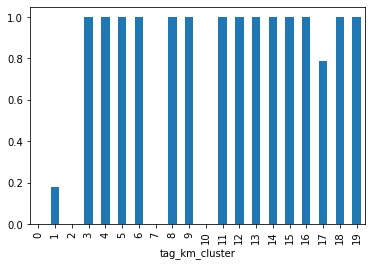

In [0]:
hashtag_typekm.plot.bar()

Мы видим, что кластеры 0, 1, 2, 7, 10 характерны для фальшивых новостей. Остальные - для реальных новостей. Проанализировав тэги этих кластеров, мы приходим к выводам, что они повторяются: общество, экономика, политика, наука, япония, ленин, курчатовский, космическая, космодром. Это говорит о том, что новости из нашего датасета, связанные с Курчатовским институтом и космическими исследованиями, явно относятся к ложным новостям. Кроме того, мы можем выявить закономерность, связанную с тем, что в фейковых новостях чаще всего используются более общие тэги (общество, политика, наука, экономика), тогда как в реальных новосятх тэги более конкретны.

In [0]:
# Looking at the average bot rating for hashtag clusters using dbscan clustering
hashtag_typedb = data.groupby('tag_dbscan_cluster')['category_label'].mean()

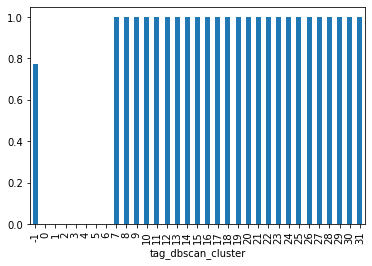

In [0]:
hashtag_typedb.plot.bar()

In [0]:
# Looking at the average bot rating for authors clusters using kmeans clustering
author_typekm = data.groupby('author_km_cluster')['category_label'].mean()

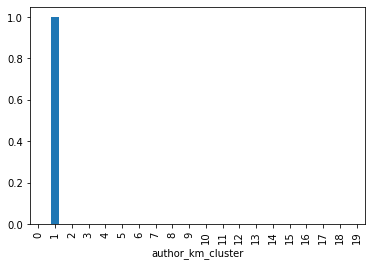

In [0]:
author_typekm.plot.bar()

Мы видим, что только авторы из кластера 1 характерны для реальных новостей. Посмотрев на состав этого кластера, мы можем сделать вывод, что его большую часть составляет None, т.е. отсутствие автора. Т.е. в нашем датасете для реальных новостей автор почти никогда не указан.

In [0]:
# Looking at the average bot rating for author clusters using dbscan clustering
author_typedbscan = data.groupby('author_dbscan_cluster')['category_label'].mean()

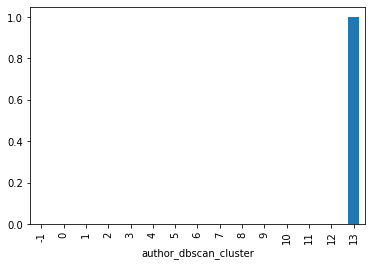

In [0]:
author_typedbscan.plot.bar()

In [0]:
# Looking at the average bot rating for tweet text clusters using kmeans clustering on ngram:1,1
articlekm11_type = data.groupby('article_km_cluster_ngram1_1')['category_label'].mean()

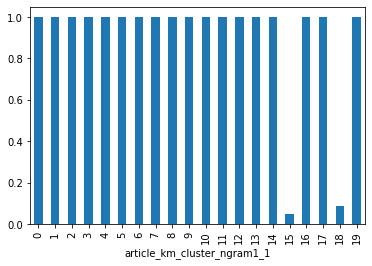

In [0]:
articlekm11_type.plot.bar()

In [0]:
# Looking at the average bot rating for tweet text clusters using kmeans clustering on ngram:2,2
articlekm22_type = data.groupby('article_km_cluster_ngram2_2')['category_label'].mean()

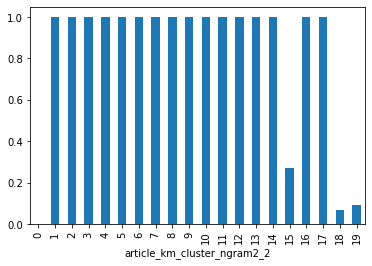

In [0]:
articlekm22_type.plot.bar()

Биграммы из кластеров 15, 18, и 19 характерны для фейковых новостей. Проанализировав их, мы приходим к выводу, что в них очень много опечаток, пропусков букв, лишних пробелов (прид тся, уч ные, ид т, сво м и т.д.). В кластерах реальных новостей мы такого не наблюдаем. Кроме того, в фейковых новостях мы видим также много местоимений и союзов (нам, это, также, которые и др.)

In [0]:
# Looking at the average bot rating for tweet text clusters using dbscan clustering on ngram:1,1
articledb22_type = data.groupby('articles_dbscan_cluster')['category_label'].mean()

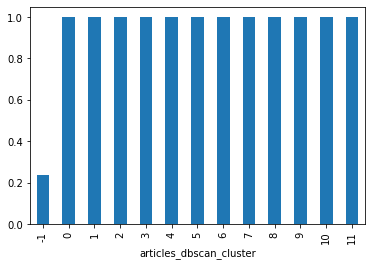

In [0]:
articledb22_type.plot.bar()

In [0]:
import flask_wtf
from flask_wtf import Form, TextField, FileField
class PuziForm(Form):
    article_url = TextField("label1")
    article = FileField("label2")

@app.route('/test', methods=['GET', 'POST'])
def test():
    form = PuziForm()
    if form.validate_on_submit():
        result = (form.article.data and form.article.data.read()) or form.article_url.data
    else:
        result = 'not submitted'
    return render_template('test.html', form=form, result=result)

ImportError: ignored